In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
model_prob = [0.004, 0.015, 0.448, 0.568, 0.780, 0.879, 0.967, 0.978]
model_class = [0, 1, 0, 1, 0, 0, 1, 1]

Model: ROC AUC = 0.688


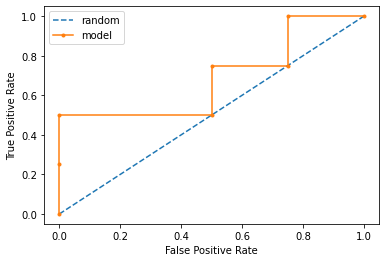

In [12]:
def plot_roc_curve(model_class, model_prob):
    random_probs = [0 for __ in range(len(model_prob))] # used for linear line to compare to ROC
    
    #AUC
    model_auc = roc_auc_score(model_class, model_prob)
    #model score
    print("Model: ROC AUC = %.3f" % (model_auc))
    
    #random model:
    random_false_pos, random_true_pos, __ = roc_curve(model_class, random_probs)
    
    #actual model:
    model_false_pos, model_true_pos, __ = roc_curve(model_class, model_prob)
    
    #roc curve plot
    plt.plot(random_false_pos, random_true_pos, linestyle = '--', label = 'random')
    plt.plot(model_false_pos, model_true_pos, marker = '.', label ='model')
    
    #labels, legend, show
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
plot_roc_curve(model_class, model_prob)

In [13]:
#Part 2: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np

df = pd.read_csv("EE627A_HW3_DataSet1.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
0,5.5986,5.5986,5.5340,5.5340,289.37,289.82,289.30,289.66,289.37,289.82,...,21.206,41.042,42.338,41.042,42.108,2.1330,2.1744,2.1175,2.1175,1
1,5.5340,5.5521,5.5108,5.5185,289.64,289.89,289.63,289.76,289.64,289.89,...,21.258,42.108,42.108,41.881,42.033,2.1175,2.1227,2.1175,2.1175,1
2,5.5185,5.5185,5.4566,5.4772,289.86,290.07,289.65,289.93,289.86,290.07,...,21.268,42.033,42.261,41.804,41.881,2.1227,2.1227,2.1124,2.1124,1
3,5.4772,5.4772,5.3894,5.3894,289.93,290.13,289.63,289.86,289.93,290.13,...,21.310,42.033,42.186,42.033,42.108,2.1227,2.1227,2.0995,2.0995,1
4,5.3894,5.4152,5.3868,5.4152,289.85,290.03,289.45,289.51,289.85,290.03,...,21.310,42.108,42.186,42.033,42.108,2.0995,2.0995,2.0943,2.0995,0


In [14]:
predictor = df.iloc[:, 0:476]
response = df[476]
response.tail()

3995    0
3996    0
3997    0
3998    1
3999    0
Name: 476, dtype: int64

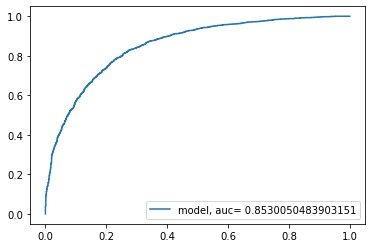

In [15]:
#fit and instantiate the model:
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
logreg.fit(predictor, response)
y_pred_proba = logreg.predict_proba(predictor)[::,1]

#modeling:
model_falsepos, model_truepos, __ = roc_curve(response, y_pred_proba)
auc = roc_auc_score(response, y_pred_proba)

#plot
plt.plot(model_falsepos, model_truepos, label ='model, auc= '+str(auc))
plt.legend()
plt.show()

In [16]:
#Task 2
training_set = df.iloc[0:3000, 0:476]
validation_set = df.iloc[3000:4000, 0:476]
response_training = df.iloc[0:3000, 476]
response_validate = df.iloc[3000:4000, 476]
#response_training = df[np.ix_([476], [0:3000])]

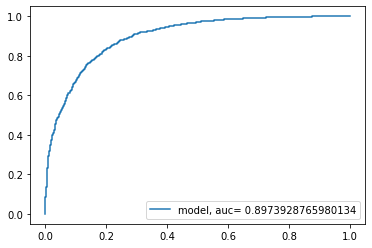

In [17]:
#training set date to apply logistic regression
model_train = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model_train.fit(training_set, response_training)
model_train_proba = model_train.predict_proba(training_set)[::,1]

training_FP, training_TP, __ = roc_curve(response_training, model_train_proba)
auc = roc_auc_score(response_training, model_train_proba)

#plot
plt.plot(training_FP, training_TP, label ='model, auc= '+str(auc))
plt.legend()
plt.show()

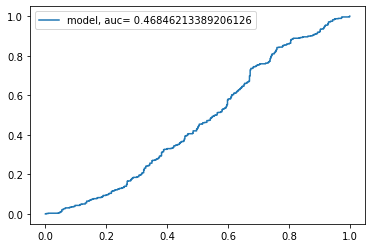

In [19]:
#validate set
model_validate_proba = model_train.predict_proba(validation_set)[::,1]

validate_FP, validate_TP, __ = roc_curve(response_validate, model_validate_proba)
auc = roc_auc_score(response_validate, model_validate_proba)

plt.plot(validate_FP, validate_TP, label ='model, auc= '+str(auc))
plt.legend()
plt.show()

In [20]:
#The validate auc is 0.468 and the training auc is 0.897, a difference of 0.429
#The validate model is not a good model because it shows that it is predicting false positives more than 50% of the time,
#which is worse than guessing. Something is wrong with the model
